# COGS 108 - Final Project 

# Overview

In this project, we are using the Yelp dataset to extract out the most common words within each review, specifically we divided into two categories: Positive and negative. We initiated the project by clearing and cutting down the dataset in order to make it most efficient for us to present the work for the research question. Then we analyzed the dataset, using the TF-IDF method (Term Frequency - Inverse Document Frequency). 

# Names

- Timothy Mak
- Huiyu Jiang
- Jaehyeon Kim
- Reilly Campbell

# Group Members IDs

- A12825008
- A14771620
- A14435558
- A12425794

# Research Question

What are the most common words associated with high/low rating Yelp reviews? How accurate are these words at predicting the rating that a user gives to a business given their review? 

## Background and Prior Work

Today, social media has a great impact on the success of businesses. More and more people tend to use online review systems to give intuitive judgment of their experiences on any services. As a real need in people's lives, business services have a variety of aspects. Customers are accustomed to evaluating the food taste of restaurants, the efficiency of travel and hotel services, the experience of entertainment events, etc. These evaluations are not only important for the subsequent customer experience but also have a significant impact on the restaurant's business. Our group, then, derived the thought of analyzing how these reviews reflect a customer’s impression of a business. Currently, online review systems usually use the combination of text reviews and star ratings. To get a clear understanding of how the text reviews link with the ratings, we choose to use the Yelp reviews dataset for our further analysis.

As one of the public companies that provide business directory service and crowd-sourced review forums, Yelp users have contributed over 100 million reviews of almost every type of local business, from restaurants, boutiques and salons to dentists, mechanics, plumbers and more. Their business resolves around the connections made between the consumers who read and write reviews and the local businesses that they describe. According to the fact sheet published in Yelp website (https://www.yelp.com/factsheet), the cumulative reviews contributed since inception has reached 184 million as of March 31, 2019. 

The Yelp dataset is a public dataset that contains a subset of Yelp’s reviews, users, businesses, etc. Based on the popularity and the huge customer base of this platform, we believe this Yelp dataset is representative to show the practical statistic relations. The reason as to why it is made widely available is for educational reasons to allow students (like ourselves) to research the data and draw our own conclusions from it. In terms of our research topic, we found some previous work that focused on the reviews analysis. These projects have helped us in both brainstorming and practical processes:

1. This “Exploratory Analysis of Yelp Restaurant Reviews” (https://rstudio-pubs-static.s3.amazonaws.com/108750_6c2d2fed642540649af16047419801f8.html?fbclid=IwAR0yDF8i3x0HfHdxxE88vaYiTNl-pT_73E2-RsF_M-eDTj8_3g9LkStkg0s) used the Yelp dataset as well. It filtered the business by category to keep only those businesses in the restaurant category and reviews related to those businesses. Same as what we have in Assignment 5, it has processed each of the reviews to build a bag of words language model. To create this model it preprocessed each document in the corpus as follows: remove non-writable characters, strip extra white spaces, lower case, etc. After that, each text was tokenized into unigrams, and the unigram frequencies were counted and stored into a document-term matrix of counts. Term counts across all the corpus showed a typical Zipf distribution. It then kept the most frequent terms, and used 20 topics by fitting a three-segment linear regression and selecting the number of topics about the middle of the second segment, and the draw different distribution in terms of the most frequent words for each topic.

2. “A Very Extensive Data Analysis of Yelp” (https://www.kaggle.com/ambarish/a-very-extensive-data-analysis-of-yelp) is another related project that we found in Kaggle. This project has covered a lot of topics we have discussed in this course. For a business it did the following analysis: Word Cloud of the reviews of the business; Top Ten most common Words reviews of the business; Sentiment Analysis - Positive and Not So Positive Words of reviews; Calculate Sentiment for the reviews; Most Common Bigrams (a collection of Two words) in the review text; Relationship among words; Topic Modelling of the reviews. And beyond EDA and text mining, it also explored Network Analysis and Geospatial analysis. For a city it spotted the most popular business and also provided a map of the city of Las vegas with the business identified as dots on the map. This project has some similarity with our topic, but we will be more focused on the positive and negative reviews, also, we will further discuss the correlation and prediction relationship between reviews and ratings. Our work will be based on what we have learned from this course. 


# Hypothesis


When people leave the reviews for the restaurants that they have been to, they either compliment or suggest something that can be improved or they criticize them. Due to those tendencies that people might implicitly have, we came up with the hypothesis that the review with high ratings (5 stars) to have more positive words compared to the bad reviews (1 star). Similarly, we hypothesized that the bad reviews with a low rating (1 star) would be associated with more negative words. It’s relatively accurate to predict that the reviews with more positive words will more likely be 5-star reviews and that the reviews with more negative words will more likely be 1-star reviews. 

# Dataset(s)

In order to predict what would be the most common words associated with High (5 Star) and Low (1 star) reviews rating from Yelp review, we decided to use the data from the Yelp Dataset Challenge. The Yelp dataset contains about six million reviews including business ids and user ids, even though we only need a few and the specific part from the dataset. In order to not be out of track for the project, we specifically utilized the text files associated with the reviews to take a look at the common words and the correlation with each star rating. Within many data, we specifically extract the “review.json,” which is the most relevant and useful data to answer our data science question. In “review.json,” we only used the text file in the consideration of privacy and data cleaning. In order to ethically utilize the data, we avoided using people’s ids, user ids, and business Ids. The size of the reviews dataset is over six million and contains a ‘star’ attribute as well as a ‘text’ attribute; however, our dataset size would be 65000 for the top (5 stars) review and 65000 for the lowest (1 star) reviews. Once we extracted the text files from the JSON file, we randomized the data using the shuffle method just to ensure the order is random.  

Dataset Name: Yelp Reviews

Link to the dataset: https://www.yelp.com/dataset

Number of observations: 65000 for one-star reviews and 65000 for five-star reviews, summing them up we have totally 130000 observations.


# Setup

In [1]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import json
from random import shuffle
import numpy as np

# Import nltk package 
#   PennTreeBank word tokenizer 
#   English language stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# scikit-learn imports
#   SVM (Support Vector Machine) classifer 
#   Vectorizer, which that transforms text data into bag-of-words feature
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
#   Metrics functions to evaluate performance
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Standard Python has some useful string tools
import string

from heapq import nlargest

# Collections is a part of standard Python, with some useful data objects
from collections import Counter
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/bigmak712/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bigmak712/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Cleaning

Major data cleaning steps:

Read data, here we only use one-star & five-star reviews to avoid bias.
Shuffle data, take a subset of the randomized data, and limit to 65000 reviews for each.
Remove punctuation and split the reviews into words.
Split data into train/test sets, so we can create a model for evaluating the performance.
Tokenize one star & five star reviews.
Remove common corpus words from the nltk lexicon.
Get the Top 20 most frequent words.
Plot bar graphs to show the frequencies.
Use the TF-IDF approach to measure the importance of each positive (negative) word to the 5-star (1-star) reviews in the corpus, which is our dataset of user reviews.
Get and graph the top words with the highest IDF scores.

In this section, we basically extract the most useful data from our original text file and then transform the text data into vectors by using TF-IDF vectorizer. As an approach to measure how important each positive & negative word is to the specific document (5-star reviews document & 1-star reviews document) in a collection of documents (dataset of user reviews), the statistic TF-IDF can help us determine the precision of relevance between top-ranked words and the corpus (user reviews). 

Graph 1: 
Counting top 10 most common words. However, we can see that nearly all of them are not relevant with the sentiment. Thus, we will remove those stop words in the next step.

Graph 2:
After removing the stopwords, we can get a relatively more accurate graph that shows the most frequent words that have some semantic significance.

The TF-IDF graph is able to tell us the ranking and scoring of those top positive words we just got above, in this way we can clearly see which words are more important to the 5-star reviews document regarding to the corpus.

Similarly, we also plot the bar graph for the TF-IDF ranking in terms of the importance of top negative words (stop-words removed) to the the 1-star reviews in the corpus.


#### Reading data

In [2]:
# Read in one-star and five-star Yelp review texts
one_star_reviews_file = open("one_star_reviews.txt", "r")
five_star_reviews_file = open("five_star_reviews.txt", "r")

# Split review texts in the files by the *STOP* token
one_star_review_list = one_star_reviews_file.read().split("*STOP*", 64999)
five_star_review_list = five_star_reviews_file.read().split("*STOP*", 64999)
    
# Close the files
one_star_reviews_file.close()
five_star_reviews_file.close()

#### Remove punctuation and split the reviews

In [3]:
for i in range(0, len(one_star_review_list)):
    r = one_star_review_list[i]
    one_star_review_list[i] = r.translate(str.maketrans('', '', string.punctuation))

for i in range(0, len(five_star_review_list)):
    r = five_star_review_list[i]
    five_star_review_list[i] = r.translate(str.maketrans('', '', string.punctuation))

#### Split data into train/test sets

In [155]:
# Split data into training/dev/test sets of size 60000/5000
neg_train_x = one_star_review_list[:50000]
pos_train_x = five_star_review_list[:50000]
neg_test_x = one_star_review_list[60000:]
pos_test_x = five_star_review_list[60000:]

#### Tokenize One Star Reviews

In [156]:
# intializing token array
tokens = []

# tokenizing words
for x in neg_train_x:
    tokens.extend(nltk.word_tokenize(x))

print('Number of words in the data: \t', len(tokens))
print('Number of unique words: \t', len(set(tokens)))

Number of words in the data: 	 7135887
Number of unique words: 	 102561


In [157]:
# removing punctuation from word list
one_counts = Counter(tokens)

for punc in string.punctuation:
    if punc in one_counts:
        one_counts.pop(punc)

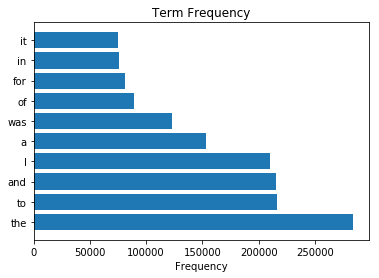

In [158]:
# counting words for term frequency
top10_one = one_counts.most_common(10)

# Extract the top words, and counts
top10_words_one = [it[0] for it in top10_one]
top10_counts_one = [it[1] for it in top10_one]

# Plot a barplot of the most frequent words in the text
plt.barh(top10_words_one, top10_counts_one)
plt.title('Term Frequency');
plt.xlabel('Frequency');

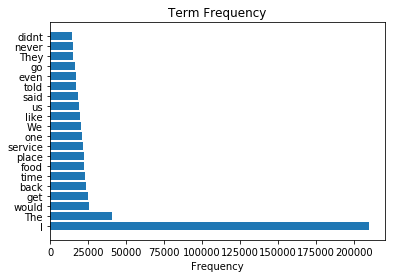

In [159]:
# removing common corpus words from nltk lexicon
for stop in nltk.corpus.stopwords.words('english'):
    if stop in one_counts:
        one_counts.pop(stop)

# Get the top 20 most frequent words, of the stopword-removed data
one_top20 = one_counts.most_common(20)

# Plot a barplot of the most frequent words in the text
plt.barh([it[0] for it in one_top20], [it[1] for it in one_top20])
plt.title('Term Frequency');
plt.xlabel('Frequency');

#### TF-IDF for One Star Reviews

In [175]:
# Initialize a TFIDF object
tfidf = TfidfVectorizer(analyzer='word',
                        sublinear_tf=True,
                        max_features=5000,
                        tokenizer=nltk.word_tokenize)

# Apply the TFIDF transformation to our data
#  Note that this takes the sentences, and tokenizes them, then applies TFIDF
tfidf_books = tfidf.fit_transform(neg_train_x).toarray()

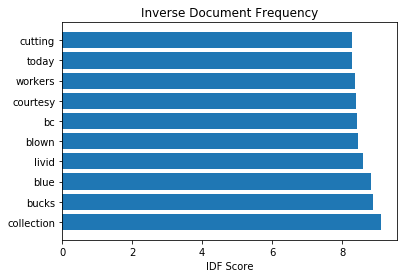

In [176]:
# Get the words with the highest IDF score
one_high_idf = np.argsort(tfidf.idf_)[::-1][:10]
top_IDF_tokens_one = [list(tfidf.vocabulary_)[words] for words in one_high_idf]
top_IDF_scores_one = tfidf.idf_[one_high_idf]

# Get top 1000 negative words
neg_high_idf = np.argsort(tfidf.idf_)[::-1][:1000]
top_IDF_tokens_neg = [list(tfidf.vocabulary_)[words] for words in neg_high_idf]
top_neg_words = set(top_IDF_tokens_neg)

# Graph the words with the highest IDF score
plt.barh(top_IDF_tokens_one, top_IDF_scores_one)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

#### Tokenize Five Star Reviews

In [162]:
# five star token list
five_tokens = []

# adding tokens
for x in pos_train_x:
    five_tokens.extend(nltk.word_tokenize(x))

print('Number of words in the data: \t', len(five_tokens))
print('Number of unique words: \t', len(set(five_tokens)))

Number of words in the data: 	 4395283
Number of unique words: 	 88127


In [163]:
# counting word list
five_counts = Counter(five_tokens)

# removing punctuation from word list
for punc in string.punctuation:
    if punc in five_counts:
        five_counts.pop(punc)

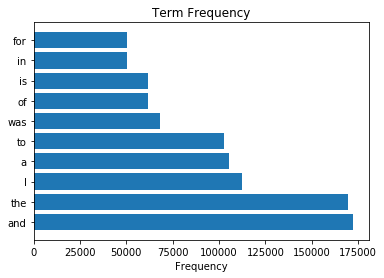

In [164]:
# getting most common words
five_top10 = five_counts.most_common(10)

# Extract the top words, and counts
five_top10_words = [it[0] for it in five_top10]
five_top10_counts = [it[1] for it in five_top10]

# Plot a barplot of the most frequent words in the text
plt.barh(five_top10_words, five_top10_counts)
plt.title('Term Frequency');
plt.xlabel('Frequency');

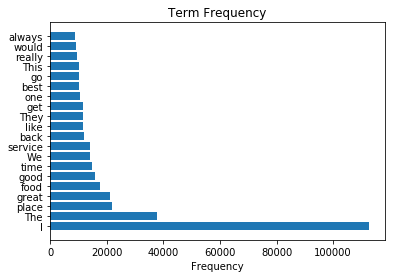

In [165]:
for stop in nltk.corpus.stopwords.words('english'):
    if stop in five_counts:
        five_counts.pop(stop)

# Get the top 20 most frequent words, of the stopword-removed data
five_top20 = five_counts.most_common(20)

# Plot a barplot of the most frequent words in the text
plt.barh([it[0] for it in five_top20], [it[1] for it in five_top20])
plt.title('Term Frequency');
plt.xlabel('Frequency');

#### TF-IDF for Five Star Reviews

In [177]:
# Apply the TFIDF transformation to our data
#  Note that this takes the sentences, and tokenizes them, then applies TFIDF
five_tfidf_books = tfidf.fit_transform(pos_train_x).toarray()

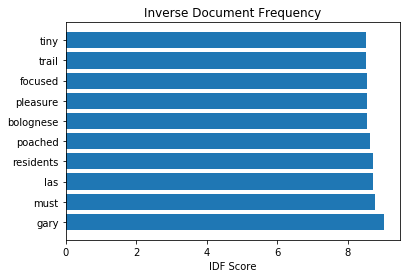

In [178]:
# Get the words with the highest IDF score
five_high_idf = np.argsort(tfidf.idf_)[::-1][:10]
top_IDF_tokens_five = [list(tfidf.vocabulary_)[words] for words in five_high_idf]
top_IDF_scores_five = tfidf.idf_[five_high_idf]

# Get top 1000 positive words
pos_high_idf = np.argsort(tfidf.idf_)[::-1][:1000]
top_IDF_tokens_pos = [list(tfidf.vocabulary_)[words] for words in pos_high_idf]
top_pos_words = set(top_IDF_tokens_pos)

# Graph the words with the highest IDF score
plt.barh(top_IDF_tokens_five, top_IDF_scores_five)
plt.title('Inverse Document Frequency');
plt.xlabel('IDF Score');

# Data Analysis & Results

Major Data analysis steps: 
Create a function to go through the input labels and compare whether there are more positive words or more negative words. If there are more positive words than negative words, it will return 1 and if there are more negative words, then it will return -1. That way, we can utilize the function when we test the data. 
Create an evaluation function to get the percentage of the accuracy of the prediction that we have made. 
Evaluate the test set using the top 100 words, then present the accuracy of prediction.
Evaluate the test set using the top 1000 words, then present the accuracy of prediction.
Evaluate the test set using the top 10000 words, then present the accuracy of prediction.
In the analysis section of the project, we created two functions to make predictions and to evaluate the accuracy of predictions. The function would loop through the positive words and negative words and then compare which word’s categories that the labels would go in. Then we created another function to evaluate the accuracy of the prediction, which also contains “unknown” values (reviews that we are not able to predict because either labels in the reviews are not within the top positive or negative words that we extracted or it had the same number of top positive/negative words). 
	After creating function that can be applied, we evaluate “pos_train_x, neg_train_x, top_pos_words, top_neg_words” (which are the data that predict function is applied) to present the accuracy. 


In [168]:
def predict_label(review, top_pos_words, top_neg_words):
    pos_count = 0
    neg_count = 0
    for w in review: 
        if w in top_pos_words:
            pos_count += 1
        if w in top_neg_words:
            neg_count += 1
            
    if pos_count > neg_count:
        return 1
    elif neg_count > pos_count:
        return -1
    else:
        return 0

In [169]:
def evaluate(pos_review_list, neg_review_list, top_pos_words, top_neg_words):
    corr_pos_count = 0
    corr_neg_count = 0
    unknown_pred_count = 0
        
    for r in pos_review_list:
        
        pred_label = predict_label(r.split(), top_pos_words, top_neg_words)
        if pred_label == 1:
            corr_pos_count += 1 
        elif pred_label == 0:
            unknown_pred_count += 1
        
    corr_pred_pos_ratio = corr_pos_count / len(pos_review_list)
    unknown_ratio = unknown_pred_count / len(pos_review_list)
    
    print("Percentage of correctly predicted positive reviews: " + str(corr_pred_pos_ratio))
    print("Percentage of unknown reviews: " + str(unknown_ratio))
    
    unknown_pred_count = 0
    
    for r in neg_review_list:
        
        pred_label = predict_label(r.split(), top_pos_words, top_neg_words)
        
        if pred_label == -1:
            corr_neg_count += 1 
        elif pred_label == 0:
            unknown_pred_count += 1
            
    corr_pred_neg_ratio = corr_neg_count / len(neg_review_list)
    unknown_ratio = unknown_pred_count / len(neg_review_list)
    
    print("Percentage of correctly predicted negative reviews: " + str(corr_pred_neg_ratio))
    print("Percentage of unknown reviews: " + str(unknown_ratio) + "\n")
    

In [179]:
print("Evaluating training data\n")
evaluate(pos_train_x, neg_train_x, top_pos_words, top_neg_words)
print("Evaluating test data\n")
evaluate(pos_test_x, neg_test_x, top_pos_words, top_neg_words)

Evaluating training data

Percentage of correctly predicted positive reviews: 0.6241
Percentage of unknown reviews: 0.0962
Percentage of correctly predicted negative reviews: 0.34538
Percentage of unknown reviews: 0.07526

Evaluating test data

Percentage of correctly predicted positive reviews: 0.6178
Percentage of unknown reviews: 0.1004
Percentage of correctly predicted negative reviews: 0.3404
Percentage of unknown reviews: 0.0826



# Ethics & Privacy

As we will be using a public dataset on published material, the usage of the data may arise an ethical issue. There is no problem with permission for using this data. The restaurant information and user reviews are originally publicly posted on Yelp. The privacy issues of our project and the dataset itself are not so many since all of the user identifications are hashed and randomized. However, in order to clearly avoid the issues that might be induced from the using the public data, we removed the data that contains users’ IDs or business's IDs, which means that it would not display or present the private information about the people who commented or any kind of personal information or business information associated with the reviews that we are utilizing.

The other problem that might have occurred would be the bias problem within the project. For example, when we draw a line to divide what words to be positive and negative, we could have implied the bias towards it; however, that can simply be solved by sorting the words within the top and the lowest review. The real problem that can be problematic would be the unique sentences such as the negative (1 star) reviews with positive words or good reviews (5 stars) with negative words. For example, people might have commented using positive words or phrases as a means of sarcasm, which could interfere with our prediction and the conclusion and vice versa. In order to solve that specific problem, we carefully filtered the dataset within each category (5 stars and 1 star), which indicates that the common words would only go according to the star rates. Another way that can be solved is that the size of the data. Since we have such as large dataset, the possibility of this issue to be occured is very low. Collaboratively with the way we filter the data and the low possibility of the issue, we avoided this specific ethical issue. 


# Conclusion & Discussion

### Top 100 Words
Training Data Performance

Percentage of correctly predicted positive reviews: **32.39%**

Percentage of unknown reviews: **49.72%**

Percentage of correctly predicted negative reviews: **21.49%**

Percentage of unknown reviews: **37.798%**

Test Data Performance

Percentage of correctly predicted positive reviews: **32.8%**

Percentage of unknown reviews: **49.5%**

Percentage of correctly predicted negative reviews: **21.96%**

Percentage of unknown reviews: **38.76%**

### Top 1000 Words
Training Data Performance

Percentage of correctly predicted positive reviews: **62.41%**

Percentage of unknown reviews: **9.62%**

Percentage of correctly predicted negative reviews: **34.538%**

Percentage of unknown reviews: **7.526%**

Test Data Performance

Percentage of correctly predicted positive reviews: **61.78%**

Percentage of unknown reviews: **10.04%**

Percentage of correctly predicted negative reviews: **34.04%**

Percentage of unknown reviews: **8.26%**

### Top 10000 Words

Training Data Performance

Percentage of correctly predicted positive reviews: **53.252%**

Percentage of unknown reviews: **35.992%**

Percentage of correctly predicted negative reviews: **71.006%**

Percentage of unknown reviews: **21.422%**

Test Data Performance

Percentage of correctly predicted positive reviews: **53.16%**

Percentage of unknown reviews: **35.5%**

Percentage of correctly predicted negative reviews: **70.44%**

Percentage of unknown reviews: **22.02%**

As these outcomes shows, the accuracy for the correctly predicted positive reviews with 100 words was 32.39% for the training set & 32.8% for the test set, and the accuracy for the correctly predicted negative words was 21.49% for the training set & 21.96% for the test set, which are relatively low. Moreover, the percentage for the unknown reviews are relatively high as well. Only with that data would not prove and justify our hypothesis. To eliminate the limitation within the data and enhance our provement, we added another set of accuracy list with more words. When we utilized 1000 words, the percentage of the accuracy clearly goes up approximately by twice as much as the percentage with 100 words. This positive statistical association shows that there are more positive words fall into the category of 1-star reviews and more negative words fall into the 5-star reviews, which clearly supports our hypothesis that the reviews with more positive words will more likely be 5 stars reviews and the reviews with more negative words will more likely be 1 star reviews. 

In consideration of further proving our findings, we also include the prediction performance of the Top 10000 Words. Our assumption are still well-presented by the incline of percentage; yet not significantly clear relative to the performance of the top 1000. Since the amount of words are largely increased, our stop-words removal may have left bias. We believe this would not affect our assumption.
